# MMDetection 설치

In [1]:
import torch
print(torch.__version__)

1.9.0+cu102


In [2]:
# mmcv-full 설치
!pip install mmcv-full

     |████████████████████████████████| 313 kB 11.4 MB/s 
     |████████████████████████████████| 185 kB 20.8 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.3.9-cp37-cp37m-linux_x86_64.whl size=29379779 sha256=277cff61506d8ec0ddc8bcf38f2d100a434ff1db7f8eba21dd2a47606690885b
  Stored in directory: /root/.cache/pip/wheels/2f/4b/7a/180870186c89ce617e1935c9ac9e4d13e643782327434b7349
Successfully built mmcv-full


In [2]:
!git clone https://github.com/open-mmlab/mmdetection.git
!cd mmdetection; python setup.py install

fatal: destination path 'mmdetection' already exists and is not an empty directory.
running install
running bdist_egg
running egg_info
writing mmdet.egg-info/PKG-INFO
writing dependency_links to mmdet.egg-info/dependency_links.txt
writing requirements to mmdet.egg-info/requires.txt
writing top-level names to mmdet.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'mmdet.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mmdet
creating build/bdist.linux-x86_64/egg/mmdet/apis
copying build/lib/mmdet/apis/inference.py -> build/bdist.linux-x86_64/egg/mmdet/apis
copying build/lib/mmdet/apis/train.py -> build/bdist.linux-x86_64/egg/mmdet/apis
copying build/lib/mmdet/apis/test.py -> build/bdist.linux-x86_64/egg/mmdet/apis
copying build/lib/mmdet/apis/__init__.py -> build/bdist.linux-x86_64/e

# Kernel should be restarted!!!!

In [3]:
from mmdet.apis import init_detector, inference_detector
import mmcv

# MS-COCO 데이터 기반으로 Faster RCNN pretrained 모델을 활용해서 inference 해보기
1. Faster RCNN pretrained 모델 다운로드
2. Faster RCNN 용 config 파일 생성
3. Inference 용 모델을 생성하고, inference 적용

In [4]:
# pretrained weight 모델을 다운로드 받기 위해서 mmdetection/chekcpoints 폴더 생성
!cd mmdetection; mkdir checkpoints

In [5]:
# pretrained 모델 다운로드 및 열어보기
!wget -O /content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
!ls -lia /content/mmdetection/checkpoints

--2021-07-25 03:29:23--  http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.254.186.225
Connecting to download.openmmlab.com (download.openmmlab.com)|47.254.186.225|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

/content/mmdetectio 100%[===================>] 159.54M  11.4MB/s    in 14s     

2021-07-25 03:29:40 (11.1 MB/s) - ‘/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]

total 163376
4590556 drwxr-xr-x  2 root root      4096 Jul 25 03:29 .
4587522 drwxr-xr-x 19 root root      4096 Jul 25 03:29 ..
4590559 -rw-r--r--  1 root root 167287506 Aug 28  2020 faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


In [ ]:
"""
# mmdetection은 상대 경로를 인자로 주면 무조건 mmdetection 디렉토리를 기준으로 함.
%cd mmdetection

from mmdet.apis import init_detector, inference_detector

# init_detector() 인자로 config 와 checkpoint를 입력함.
model = init_detector(config='configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py', checkpoint='checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth')
%cd /content
"""

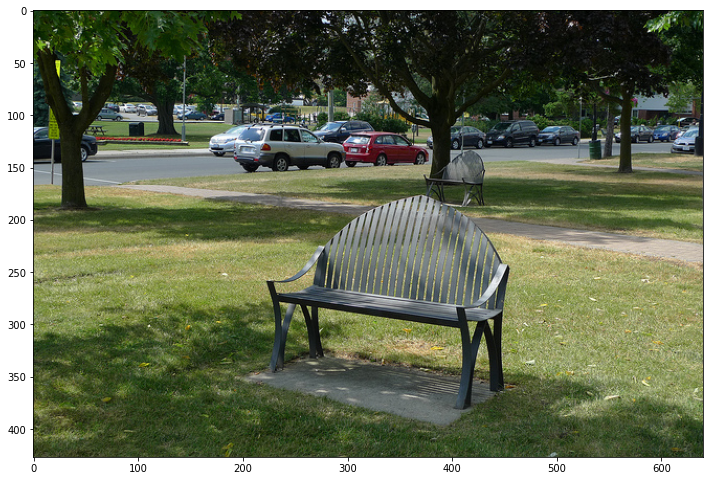

In [22]:
import cv2
import matplotlib.pyplot as plt
img = '/content/mmdetection/demo/demo.jpg'

img_arr = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,12))
plt.imshow(img_arr)

In [23]:
# config 파일과 pretrained 모델을 기반으로 detector 모델을 생성, # 앞에서 import 했지만 다시 해주자
from mmdet.apis import init_detector, inference_detector

# config 파일 설정 및 다운로드 받은 pretrained 모델을 checkpoint로 설정
config_file = '/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

model = init_detector(config_file, checkpoint_file, device='cuda:0')

# inference_detector 의 인자로 string(file 경로), ndarray가 단일 또는 list 형태로 입력 될 수 있음.
results = inference_detector(model, img)

/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/builder.py:16: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


Use load_from_local loader


/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/datasets/utils.py:68: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:323: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:360: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


In [25]:
# results 는 list 형으로 coco class의 0 부터 79 까지 class_id 별로 80 개의 array를 가짐.
# 개별 array 들은 각 클래스별로 5개의 값(좌표 값과 class 별로 confidence)을 가짐. 개별 class 별로 여러 개의 좌표를 가지면 여러개의 array가 생성됨.
# 좌표는 좌상단(x_min, y_min), 우하단(x_max, y_max) 기준
# 개별 array의 shape = (detection된 objects들의 수, 5(좌표와 confidence)) 
results

[array([[3.75348572e+02, 1.19171005e+02, 3.81950867e+02, 1.34460617e+02,
         1.35454789e-01],
        [5.32362000e+02, 1.09554726e+02, 5.40526550e+02, 1.25222633e+02,
         8.88788104e-02],
        [3.61124298e+02, 1.09049202e+02, 3.68625610e+02, 1.22483063e+02,
         7.20716342e-02]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([[6.09650024e+02, 1.13805901e+02, 6.34511658e+02, 1.36951904e+02,
         9.88766015e-01],
        [4.81773712e+02, 1.10480995e+02, 5.22459717e+02, 1.30407104e+02,
         9.87157285e-01],
        [1.01821303e+00, 1.12144722e+02, 6.04374390e+01, 1.44173752e+02,
         9.83206093e-01],
        [2.94623749e+02, 1.17035233e+02, 3.78022675e+02, 1.50550873e+02,
         9.71326888e-01],
        [3.96328979e+02, 1.11203323e+02, 4.32490540e+02, 1.32729263e+02,
         9.67802048e-01],
        [5.90976318e+02, 1.10802658e+02, 6.15401917e+02, 1.26493553e+02,
         9.59414959e-01],
        [2.67582001e+02, 1.05686005e+02, 3.28818756

In [13]:
results[0].shape, results[1].shape, results[2].shape, results[3].shape

((3, 5), (0, 5), (46, 5), (0, 5))

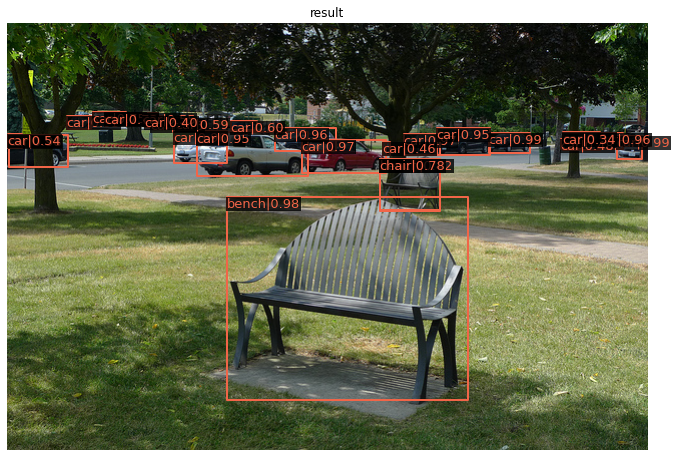

In [24]:
from mmdet.apis import show_result_pyplot
# inference 된 결과를 원본 이미지에 적용하여 새로운 image로 생성(bounding box 처리된 image)
# default 로 score_threshold 가 0.3 이상인 objects 만 시각화 적용함. show_result_pyplot은 model.show_result()를 호출한다.
show_result_pyplot(model, img, results)

## Model의 config 설정 확인해보기

In [27]:
model.__dict__

{'CLASSES': ('person',
  'bicycle',
  'car',
  'motorcycle',
  'airplane',
  'bus',
  'train',
  'truck',
  'boat',
  'traffic_light',
  'fire_hydrant',
  'stop_sign',
  'parking_meter',
  'bench',
  'bird',
  'cat',
  'dog',
  'horse',
  'sheep',
  'cow',
  'elephant',
  'bear',
  'zebra',
  'giraffe',
  'backpack',
  'umbrella',
  'handbag',
  'tie',
  'suitcase',
  'frisbee',
  'skis',
  'snowboard',
  'sports_ball',
  'kite',
  'baseball_bat',
  'baseball_glove',
  'skateboard',
  'surfboard',
  'tennis_racket',
  'bottle',
  'wine_glass',
  'cup',
  'fork',
  'knife',
  'spoon',
  'bowl',
  'banana',
  'apple',
  'sandwich',
  'orange',
  'broccoli',
  'carrot',
  'hot_dog',
  'pizza',
  'donut',
  'cake',
  'chair',
  'couch',
  'potted_plant',
  'bed',
  'dining_table',
  'toilet',
  'tv',
  'laptop',
  'mouse',
  'remote',
  'keyboard',
  'cell_phone',
  'microwave',
  'oven',
  'toaster',
  'sink',
  'refrigerator',
  'book',
  'clock',
  'vase',
  'scissors',
  'teddy_bear',


In [28]:
print(model.cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.

### array를 inference_detector()에 입력할 경우에는 원본 array를 BGR 형태로 입력 필요(RGB 변환은 내부에서 수행하므로 BGR로 입력 필요)

/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:323: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:360: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


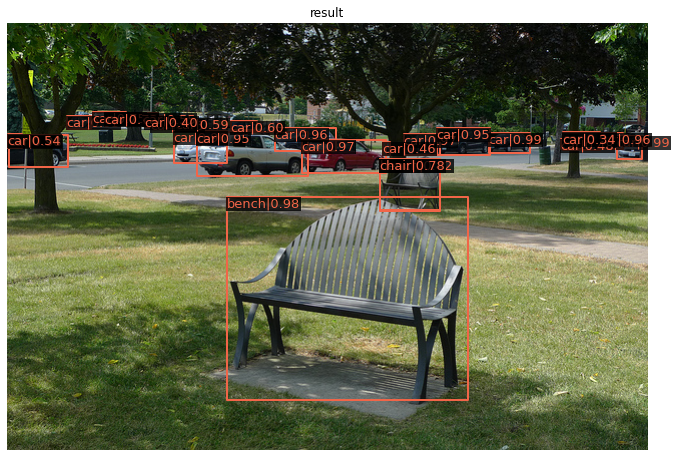

In [29]:
# BGR 입력 위해서
img_arr = cv2.imread('/content/mmdetection/demo/demo.jpg')
results = inference_detector(model, img_arr)

show_result_pyplot(model, img_arr, results)

### Bonus tip. <show_result_pyplot()을 이용하지 않고 custom 함수로 inference 결과를 image로 표현하기
- model과 image array를 입력하면 해당 image를 detect 하고 bounding box 처리해주는 `get_detected_img()` 함수 생성.
- 주의: coco 클래스 맵핑은 0부터 순차적으로 적용됨.
- results에 들어있는 array 값이 없는 경우는 해당 list의 index에 해당하는 class_id 값으로 object가 detection 되지 않은 것임.
- 개별 class의 score_threshold가 낮은 값은 제외


In [30]:
# 0부터 순차적으로 클래스 매핑된 label 적용. 
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }

labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

### Tip for np.where 사용

In [33]:
import numpy as np

#exmaple
arr1 = np.array([[3.75348572e+02, 1.19171005e+02, 3.81950867e+02, 1.34460617e+02,
         1.35454759e-01],
        [5.32362000e+02, 1.09554726e+02, 5.40526550e+02, 1.25222633e+02,
         8.88786465e-01],
        [3.61124298e+02, 1.09049202e+02, 3.68625610e+02, 1.22483063e+02,
         7.20717013e-02]], dtype=np.float32)

print(arr1.shape)

arr1_filtered = arr1[np.where(arr1[:,4] > 0.1)]
print('### arr1_filtered: ', arr1_filtered, arr1_filtered.shape)

(3, 5)
### arr1_filtered:  [[3.75348572e+02 1.19171005e+02 3.81950867e+02 1.34460617e+02
  1.35454759e-01]
 [5.32362000e+02 1.09554726e+02 5.40526550e+02 1.25222633e+02
  8.88786495e-01]] (2, 5)


In [41]:
arr2 = np.array([[6, 7, 8,9, 10], [1,2,3, 4, 5], [1, 2, 3, 4, 15]], dtype=np.int64)
arr2

array([[ 6,  7,  8,  9, 10],
       [ 1,  2,  3,  4,  5],
       [ 1,  2,  3,  4, 15]])

In [42]:
arr2[:,4]

array([10,  5, 15])

In [43]:
arr2_filtered = arr2[np.where(arr2[:,4] > 6)]
print(arr2_filtered, arr2_filtered.shape)

[[ 6  7  8  9 10]
 [ 1  2  3  4 15]] (2, 5)


## customized function (get_detected_img) 함수 만들기

In [44]:
# model과 원본 이미지 array, filtering할 기준 class confidence score를 인자로 가지는 inference 시각화용 함수 생성. 
def get_detected_img(model, img_array, score_threshold=0.3, is_print=True):
    # 인자로 들어온 image_array 복사. 꼬이지 않도록.
    draw_img = img_array.copy()
    bbox_color = (0,255,0) # green
    text_color = (0,0,255) # blue?

    # model과 image_array 를 입력 인자로 inference_detection 수행하고, 결과를 results 로 받음
    # results 는 80 개의 2차원 array(shape=(오브젝트 갯수, 5(좌표, confidence))) 를 가지는 list 임.
    results = inference_detector(model, img_array)
    
    # 80개의 array 원소를 가지는 results 리스트를 loop를 돌면서 개별 2차원 array들을 추출하고 이를 기반으로 이미지 시각화
    # results 리스트의 위치 index가 바로 coco 매핑된 class_id 임. 여기서는 result_ind가 class_id
    # 개별 2차원 array에 오브젝트별 좌표와 class confidence score 값을 가짐.
    for result_ind, result in enumerate(results):
        # 개별 2차원 array의 row_size가 0이면 해당 class_id 값이 없으므로 다음 loop 진행
        if len(result) == 0:
            continue
        
        # 2차원 array 에서 5 번째 컬럼에 해당하는 값이 score threshold 이며(confidence) 이 값이 함수 인자로 들어온 score_threshold 보다 낮은 경우는 제외함.
        result_filtered = result[np.where(result[:,4] > score_threshold)]

        # 해당 클래스 별로 detected objects 의 정보가 2차원 array에 담겨 있으며, 이 2차원 array를 row 수 만큼 iteration 해서 개별 오브젝트의 좌표값 추출.
        for i in range(len(result_filtered)):
            # 좌상단, 우하단 좌표 추출
            left = int(result_filtered[i, 0])
            top = int(result_filtered[i, 1])
            right = int(result_filtered[i, 2])
            bottom = int(result_filtered[i, 3])

            caption = "{}:{:.4f}".format(labels_to_names_seq[result_ind], result_filtered[i, 4])

            # bounding box
            cv2.rectangle(draw_img, (left, top), (right, bottom), color=bbox_color, thickness = 2)

            # caption, text
            cv2.putText(draw_img, caption, (int(left), int(top-7)), cv2.FONT_HERSHEY_SIMPLEX, 0.37, text_color, 1)

            if is_print:
                print(caption)
    return draw_img

## custom function test

In [45]:
!mkdir data
!wget -O /content/data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
!ls -lia /content/data/beatles01.jpg

--2021-07-25 04:01:21--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘/content/data/beatles01.jpg’

/content/data/beatl 100%[===================>] 374.14K  --.-KB/s    in 0.02s   

2021-07-25 04:01:22 (23.3 MB/s) - ‘/content/data/beatles01.jpg’ saved [383118/383118]

4590566 -rw-r--r-- 1 root root 383118 Jul 25 04:01 /content/data/beatles01.jpg


In [46]:
img_arr = cv2.imread('/content/data/beatles01.jpg')

person:0.9988
person:0.9982
person:0.9980
person:0.9971
person:0.9604
car:0.9693
car:0.9686
car:0.9648
car:0.9517
car:0.9254
car:0.9030
car:0.8312
car:0.8008
car:0.7331
car:0.6208
tie:0.5924


/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:323: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:360: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


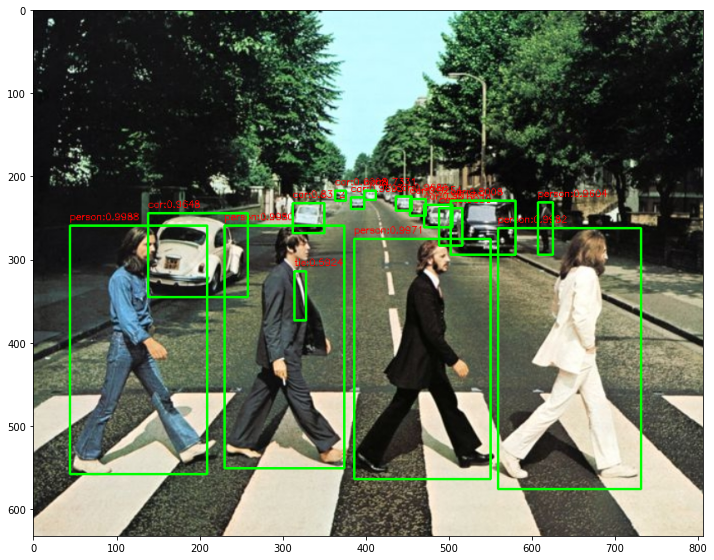

In [47]:
detected_img = get_detected_img(model, img_arr, score_threshold=0.5, is_print=True)
detected_img = cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,12))
plt.imshow(detected_img)

# Video inference 
- mmedetection의 video_demo.py 로 video_inference 수행시 image 처리 시간이 상대적으로 오래 걸림.
- 이미지 처리 로직을 변경해서 적용해보기

In [48]:
!wget -O /content/data/John_Wick_small.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true

--2021-07-25 04:04:50--  https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4 [following]
--2021-07-25 04:04:50--  https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4 [following]
--2021-07-25 04:04:51--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.

In [49]:
from mmdet.apis import init_detector, inference_detector
import mmcv

config_file = '/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'
model = init_detector(config_file, checkpoint_file, device='cuda:0')

/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/builder.py:16: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


Use load_from_local loader


### 먼저 video_demo.py 대로 video detection 수행 (비교 위해)

In [51]:
# https://github.com/open-mmlab/mmdetection/blob/master/demo/video_demo.py 대로 video detection 수행. 

import cv2

video_reader = mmcv.VideoReader('/content/mmdetection/demo/demo.mp4')
video_writer = None
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter('/content/mmdetection/demo/demo_out.mp4', fourcc, video_reader.fps, (video_reader.width, video_reader.height))

for frame in mmcv.track_iter_progress(video_reader):
    result = inference_detector(model, frame)
    frame = model.show_result(frame, result, score_thr = 0.4)

    video_writer.write(frame)

if video_writer:
    video_writer.release()

[                                                  ] 0/67, elapsed: 0s, ETA:

/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:323: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:360: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 67/67, 2.8 task/s, elapsed: 24s, ETA:     0s


In [52]:
video_reader = mmcv.VideoReader('/content/data/John_Wick_small.mp4')
video_writer = None
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter('/content/data/John_Wick_small_out1.mp4', fourcc, video_reader.fps, (video_reader.width, video_reader.height))

for frame in mmcv.track_iter_progress(video_reader):
    result = inference_detector(model, frame)
    frame = model.show_result(frame, result, score_thr = 0.4)

    video_writer.write(frame)

if video_writer:
    video_writer.release()

[                                                  ] 0/58, elapsed: 0s, ETA:

/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:323: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:360: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 3.5 task/s, elapsed: 17s, ETA:     0s


## custom 함수 만들기
- 기존에 사용한 `get_detected_img()`를 그대로 사용함!!

In [ ]:
# # model과 원본 이미지 array, filtering할 기준 class confidence score를 인자로 가지는 inference 시각화용 함수 생성. 
# import numpy as np

# # 0부터 순차적으로 클래스 매핑된 label 적용. 
# labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
#                         11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
#                         21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
#                         31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
#                         41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
#                         51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
#                         61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
#                         71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }

# def get_detected_img(model, img_array,  score_threshold=0.3, is_print=True):
#   # 인자로 들어온 image_array를 복사. 
#   draw_img = img_array.copy()
#   bbox_color=(0, 255, 0)
#   text_color=(0, 0, 255)

#   # model과 image array를 입력 인자로 inference detection 수행하고 결과를 results로 받음. 
#   # results는 80개의 2차원 array(shape=(오브젝트갯수, 5))를 가지는 list. 
#   results = inference_detector(model, img_array)

#   # 80개의 array원소를 가지는 results 리스트를 loop를 돌면서 개별 2차원 array들을 추출하고 이를 기반으로 이미지 시각화 
#   # results 리스트의 위치 index가 바로 COCO 매핑된 Class id. 여기서는 result_ind가 class id
#   # 개별 2차원 array에 오브젝트별 좌표와 class confidence score 값을 가짐. 
#   for result_ind, result in enumerate(results):
#     # 개별 2차원 array의 row size가 0 이면 해당 Class id로 값이 없으므로 다음 loop로 진행. 
#     if len(result) == 0:
#       continue
    
#     # 2차원 array에서 5번째 컬럼에 해당하는 값이 score threshold이며 이 값이 함수 인자로 들어온 score_threshold 보다 낮은 경우는 제외. 
#     result_filtered = result[np.where(result[:, 4] > score_threshold)]
    
#     # 해당 클래스 별로 Detect된 여러개의 오브젝트 정보가 2차원 array에 담겨 있으며, 이 2차원 array를 row수만큼 iteration해서 개별 오브젝트의 좌표값 추출. 
#     for i in range(len(result_filtered)):
#       # 좌상단, 우하단 좌표 추출. 
#       left = int(result_filtered[i, 0])
#       top = int(result_filtered[i, 1])
#       right = int(result_filtered[i, 2])
#       bottom = int(result_filtered[i, 3])
#       caption = "{}: {:.4f}".format(labels_to_names_seq[result_ind], result_filtered[i, 4])
#       cv2.rectangle(draw_img, (left, top), (right, bottom), color=bbox_color, thickness=2)
#       cv2.putText(draw_img, caption, (int(left), int(top - 7)), cv2.FONT_HERSHEY_SIMPLEX, 0.37, text_color, 1)
#       if is_print:
#         print(caption)

#   return draw_img

In [53]:
import time

def get_detected_video(model, input_path, output_path, score_threshold, do_print=True):
    cap = cv2.VideoCapture(input_path)
    codec = cv2.VideoWriter_fourcc(*'XVID')

    vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    vid_fps = cap.get(cv2.CAP_PROP_FPS)

    vid_writer = cv2.VideoWriter(output_path, codec, vid_fps, vid_size)

    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    print('총 frame 갯수: ', frame_cnt)

    start_time = time.time()
    while True:
        hasFrame, img_frame = cap.read()
        if not hasFrame:
            print('더 이상 처리할 frame이 없습니다.')
            break
        processing_time = time.time()
        img_frame = get_detected_img(model, img_frame, score_threshold=score_threshold, is_print=False)
        if do_print:
            print('frame별 detection 수행 시간: ', round(time.time() - processing_time, 4))
        vid_writer.write(img_frame)
    # end of while-loop

    vid_writer.release()
    cap.release()

    print('최종 detection 완료 수행 시간: ', round(time.time() - start_time, 4))

In [54]:
get_detected_video(model, '/content/mmdetection/demo/demo.mp4', '/content/mmdetection/demo/demo_customed_out.mp4', score_threshold=0.4, do_print=True)
get_detected_video(model, '/content/data/John_Wick_small.mp4', '/content/data/John_Wick_small_customed_out.mp4', score_threshold=0.4, do_print=True)

총 frame 갯수:  67
frame별 detection 수행 시간:  0.1236


/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:323: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:360: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


frame별 detection 수행 시간:  0.1162
frame별 detection 수행 시간:  0.1122
frame별 detection 수행 시간:  0.1178
frame별 detection 수행 시간:  0.1165
frame별 detection 수행 시간:  0.1157
frame별 detection 수행 시간:  0.1125
frame별 detection 수행 시간:  0.1206
frame별 detection 수행 시간:  0.1146
frame별 detection 수행 시간:  0.1114
frame별 detection 수행 시간:  0.112
frame별 detection 수행 시간:  0.1138
frame별 detection 수행 시간:  0.1128
frame별 detection 수행 시간:  0.1148
frame별 detection 수행 시간:  0.1153
frame별 detection 수행 시간:  0.1226
frame별 detection 수행 시간:  0.1115
frame별 detection 수행 시간:  0.1129
frame별 detection 수행 시간:  0.1129
frame별 detection 수행 시간:  0.113
frame별 detection 수행 시간:  0.1198
frame별 detection 수행 시간:  0.1127
frame별 detection 수행 시간:  0.1113
frame별 detection 수행 시간:  0.1185
frame별 detection 수행 시간:  0.1162
frame별 detection 수행 시간:  0.1142
frame별 detection 수행 시간:  0.1184
frame별 detection 수행 시간:  0.1168
frame별 detection 수행 시간:  0.1131
frame별 detection 수행 시간:  0.1111
frame별 detection 수행 시간:  0.1112
frame별 detection 수행 시간:  0.1166
frame별 det